# Библиотеки

In [47]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
import pandas as pd
from IPython.display import Image

In [49]:
import math

import numpy as np; np.random.seed(13)
import matplotlib.pyplot as plt

In [50]:
import statistics
import seaborn as sns
import statsmodels.api as sm

import statsmodels.formula.api as smf

from scipy import stats
from numpy import random

**Процесс машинного обучения :**
- вопрос
- подготовка данных +  feature engineering
- машинное обучение 
- валидация 

**Модель** - объект, который на вход получает некторую информацию про наш объект, а возвращает предскажанное значение: класс, значение среднего, кластер 

**Обучение** - подбор параметров, которые минизируют ошибку (любую другую метрику)

**Машинное обучение. основная задача** - приобрети генерализированные знания,которые можно обобщить на новые объекты 

<div class="alert alert-warning">
<h2> Пандас </h2>
</div>

In [51]:
# импортирует датасет о брилиантах
diamonds = pd.read_csv('data//diamonds.csv').sample(400).reset_index(drop = True)

- df.iloc[,] - братишка для отбора строк/столбцов по индексам, как в таблице

- df.loc[,] - братишка для отбора строк/столбцов по названиям

In [52]:
# через iloc
diamonds.iloc[[2, 9], [1, 5]]

,carat,depth
2,1.02,61.1
9,0.77,62.9


In [53]:
# через iloc = integer location
diamonds.iloc[0:5,0:4]

,Unnamed: 0,carat,cut,color
0,11623,1.20,Ideal,I
1,53687,0.80,Very Good,E
2,6480,1.02,Premium,F
3,40392,0.53,Ideal,G
4,37664,0.42,Premium,F


In [54]:
# через loc
diamonds.loc[:, ['carat' ,'depth']]

,carat,depth
0,1.20,60.5
1,0.80,62.9
2,1.02,61.1
3,0.53,59.9
4,0.42,61.8
...,...,...
395,0.33,61.9
396,0.30,62.1
397,1.04,61.8
398,1.03,61.6


In [55]:
# певые 8 хотя пишу 7 
diamonds.loc[:7] #если индекс представляет собой последовательность чисел от 0 с шагом 1

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,11623,1.20,Ideal,I,SI2,60.5,58.0,5050,6.92,6.83,4.16
1,53687,0.80,Very Good,E,SI2,62.9,54.0,2715,5.91,6.02,3.75
2,6480,1.02,Premium,F,SI2,61.1,62.0,4057,6.54,6.49,3.98
3,40392,0.53,Ideal,G,SI2,59.9,57.0,1132,5.25,5.30,3.16
4,37664,0.42,Premium,F,SI1,61.8,58.0,992,4.84,4.81,2.98
5,16750,1.04,Very Good,G,VS1,63.1,57.0,6669,6.39,6.44,4.05
6,34751,0.41,Premium,H,SI1,62.0,59.0,876,4.80,4.78,2.97
7,37916,0.41,Ideal,F,VS1,61.9,57.0,1007,4.73,4.77,2.94


In [56]:
# певые 8 хотя пишу 7 
# diamonds.iloc[:7]
diamonds.iloc[0:7]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,11623,1.20,Ideal,I,SI2,60.5,58.0,5050,6.92,6.83,4.16
1,53687,0.80,Very Good,E,SI2,62.9,54.0,2715,5.91,6.02,3.75
2,6480,1.02,Premium,F,SI2,61.1,62.0,4057,6.54,6.49,3.98
3,40392,0.53,Ideal,G,SI2,59.9,57.0,1132,5.25,5.30,3.16
4,37664,0.42,Premium,F,SI1,61.8,58.0,992,4.84,4.81,2.98
5,16750,1.04,Very Good,G,VS1,63.1,57.0,6669,6.39,6.44,4.05
6,34751,0.41,Premium,H,SI1,62.0,59.0,876,4.80,4.78,2.97


In [57]:
# возвращает серию с числом колонок каждого из типов
diamonds.dtypes.value_counts()

float64    6
object     3
int64      2
dtype: int64

In [58]:
# возвращает часть датафрэйма, куда были включены колонки с типами, указанными в include, или исключены колонки с типами, указанными в exclude
diamonds.select_dtypes(include=['int64', 'float64' ], exclude=['object']).head(1)

,Unnamed: 0,carat,depth,table,price,x,y,z
0,11623,1.2,60.5,58.0,5050,6.92,6.83,4.16


In [59]:
# возвращает коллекцию с индексом всех строк
diamonds.index

RangeIndex(start=0, stop=400, step=1)

In [60]:
# фильтрация по нескольким условиям
diamonds[(diamonds['carat']>2) & (diamonds['depth']>2) ].head(2)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
21,25916,2.20,Premium,J,VS1,61.7,59.0,15064,8.30,8.34,5.13
46,27523,2.53,Premium,H,SI1,62.1,59.0,18254,8.83,8.73,5.45


In [61]:
titatnic = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')

In [62]:
titatnic.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [63]:
# быстро найти долю
norm_data = pd.DataFrame(titatnic[['lunch']].value_counts(normalize= True)).reset_index()
norm_data

,lunch,0
0,standard,0.645
1,free/reduced,0.355


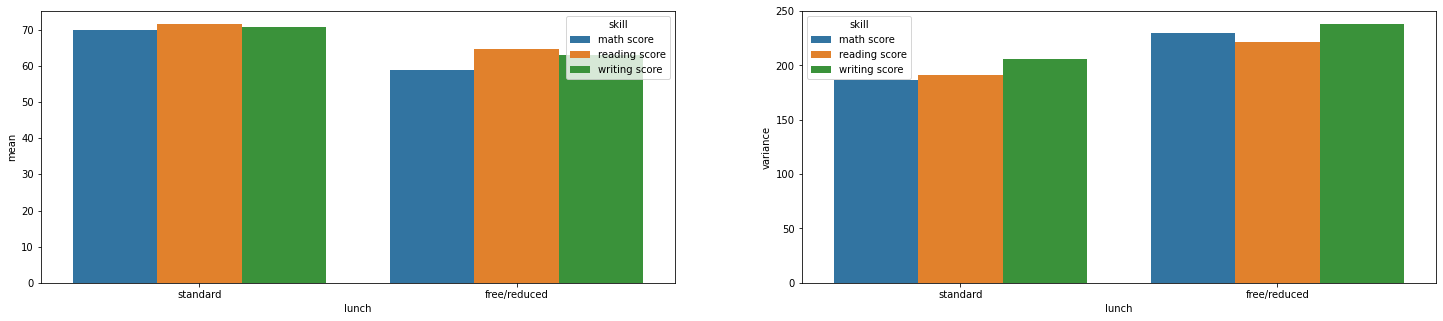

In [64]:
students = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')
box = []
for i in students['lunch'].unique():
    data = students.query('lunch == @i').iloc[0:, -3:]
    mean_ = data.describe().iloc[1]
    variance = data.describe().iloc[2]**2
    col = data.describe().columns
    for j in range(len(mean_)):
        box.append([i, col[j], mean_[j], variance[j] ])
df = pd.DataFrame(box, columns = ['lunch', 'skill', 'mean', 'variance' ])

f, axes = plt.subplots(1, 2, figsize=(25,5))
for i, col in enumerate(['mean', 'variance']):
    sns.barplot(x = 'lunch', y =col, hue ='skill', data =df , ax= axes[i])

In [65]:
# метод isin
students[students['parental level of education'].isin(["bachelor's degree", "master's degree"])].head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group B,master's degree,standard,none,90,95,93


In [66]:
# фильтр
students.filter(like = 'score' , axis = 1).head()
#  Аргумент like отбирает те лэйблы, где встречается поданное значение
# Аргумент axis отвечает за то, какие лэйблы мы рассматриваем - индекс или колонки
# Аргумент regex отбирает лэйблы, подходящие к переданному паттерну
# Аргумент items отбирает лэйблы, переданные в коллекции в качестве значения
# Можно использовать только один из аргументов items, like, regex

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [67]:
('students + g')[0].upper()+('students + g')[1:]

'Students + g'

In [68]:
# группировка без индекса сразу
students.groupby('gender' , as_index = False).agg({'math score':np.mean})

,gender,math score
0,female,63.633205
1,male,68.728216


In [69]:
# работа с мультииндексами
st = students.groupby(['gender', 'race/ethnicity'] , as_index = True).agg({'math score':np.mean, 'reading score':np.mean})
st.loc[[('female', 'group A'),
        ('female', 'group C') ]]

math score  reading score
gender race/ethnicity                           
female group A          58.527778      69.000000
       group C          62.033333      71.944444

In [70]:
# получить топ 5 математиков девуше и юношей
students.sort_values(['gender', 'math score'] , ascending = False) \
        .groupby(['gender']) \
        .head(1) \
        .reset_index(drop =True)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group E,associate's degree,free/reduced,completed,100,100,93
1,female,group E,some college,standard,none,100,92,97


In [71]:
# добавить сразу много столбцы
students= students.assign(total_score = students['math score'] + students['reading score'] + students['writing score'] ,
                         total_score_log = np.log(students['math score'] + students['reading score'] + students['writing score']))
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,218,5.384495
1,female,group C,some college,standard,completed,69,90,88,247,5.509388
2,female,group B,master's degree,standard,none,90,95,93,278,5.627621
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,4.997212
4,male,group C,some college,standard,none,76,78,75,229,5.433722
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,5.641907
996,male,group C,high school,free/reduced,none,62,55,55,172,5.147494
997,female,group C,high school,free/reduced,completed,59,71,65,195,5.273000
998,female,group D,some college,standard,completed,68,78,77,223,5.407172


In [72]:
# чтобы убрать индекс  Unnamed: 0
dota =pd.read_csv('https://stepik.org/media/attachments/course/4852/accountancy.csv', 
                  index_col=0)

In [73]:
# crosstab
pd.crosstab (dota['Executor'], dota['Type'])

Type,A,B,C,D,E,F
Executor,,,,,,
Loopa,1,6,6,7,6,2
Pupa,6,1,2,4,5,4


In [74]:
concentrations = pd.read_csv('http://stepik.org/media/attachments/course/4852/algae.csv')
mean_concentrations = concentrations.groupby(['genus']).mean()
round(concentrations.query('genus == "Fucus"').describe(), 2)

,sucrose,alanin,citrate,glucose,oleic_acid
count,3.00,3.00,3.00,3.00,3.00
mean,4.36,3.57,4.21,2.81,3.37
std,2.11,3.15,2.69,0.71,3.05
min,3.00,0.35,1.22,2.27,0.30
25%,3.14,2.03,3.11,2.41,1.85
50%,3.28,3.71,5.00,2.55,3.39
75%,5.03,5.18,5.71,3.09,4.90
max,6.79,6.64,6.42,3.62,6.41


<div class="alert alert-warning">
<h2> Визуализация </h2>
</div>

In [75]:
students.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,218,5.384495
1,female,group C,some college,standard,completed,69,90,88,247,5.509388


<AxesSubplot:xlabel='math score', ylabel='reading score'>

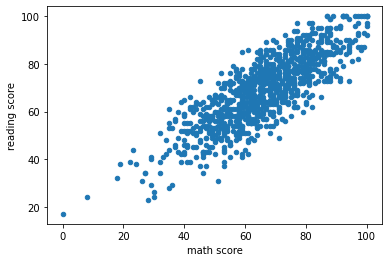

In [76]:
students.plot.scatter(x = 'math score', y = 'reading score')

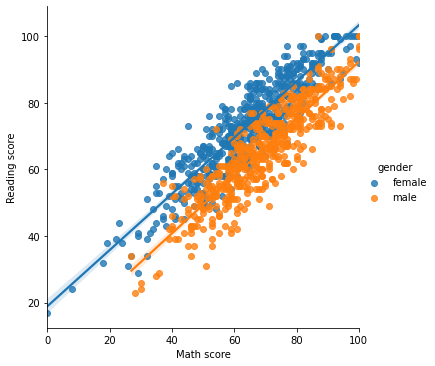

In [77]:
ax = sns.lmplot(x='math score', y='reading score', hue='gender', data=students, fit_reg = True)
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score')

In [78]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/income.csv')

<AxesSubplot:>

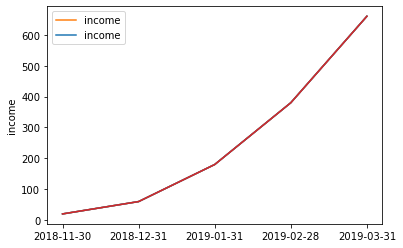

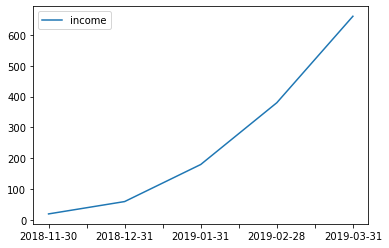

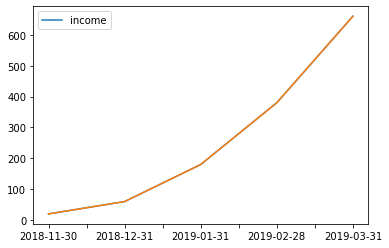

In [79]:
# построить линию
sns.lineplot(x=df.index, y=df.income)

df['income'].plot()

sns.lineplot(data=df)

plt.plot(df.index, df.income)

df.plot(kind='line')

df.plot()

df.income.plot()

In [80]:
df = pd.read_csv("https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv", sep=",", index_col=0)

array([[<AxesSubplot:title={'center':'lenths'}>]], dtype=object)

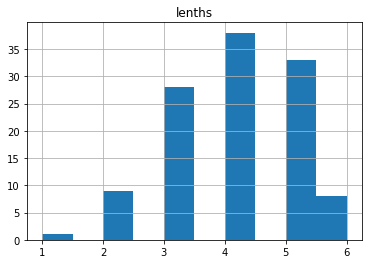

In [81]:
lenths = [len(r.split(',')) for r in df.roles]
df['lenths'] = lenths
df[['lenths']].hist()

In [82]:
df = pd.read_csv("https://stepik.org/media/attachments/course/4852/iris.csv", sep=",", index_col=0)

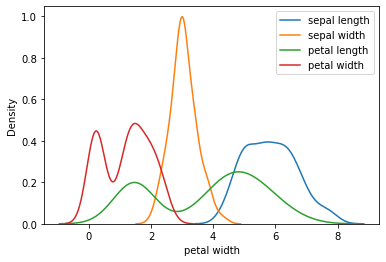

In [83]:
for name in df.filter(like='al').columns:
    sns.distplot(df[name], label=name, hist=False)
plt.legend()

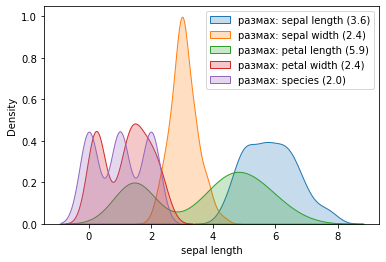

In [84]:
for column in df:
    sns.kdeplot(df[column], label=f'размах: {column} ({df[column].max() - df[column].min():.1f})', shade=True)
plt.legend()

In [85]:
1 if i not in [0, 1] else 0

0

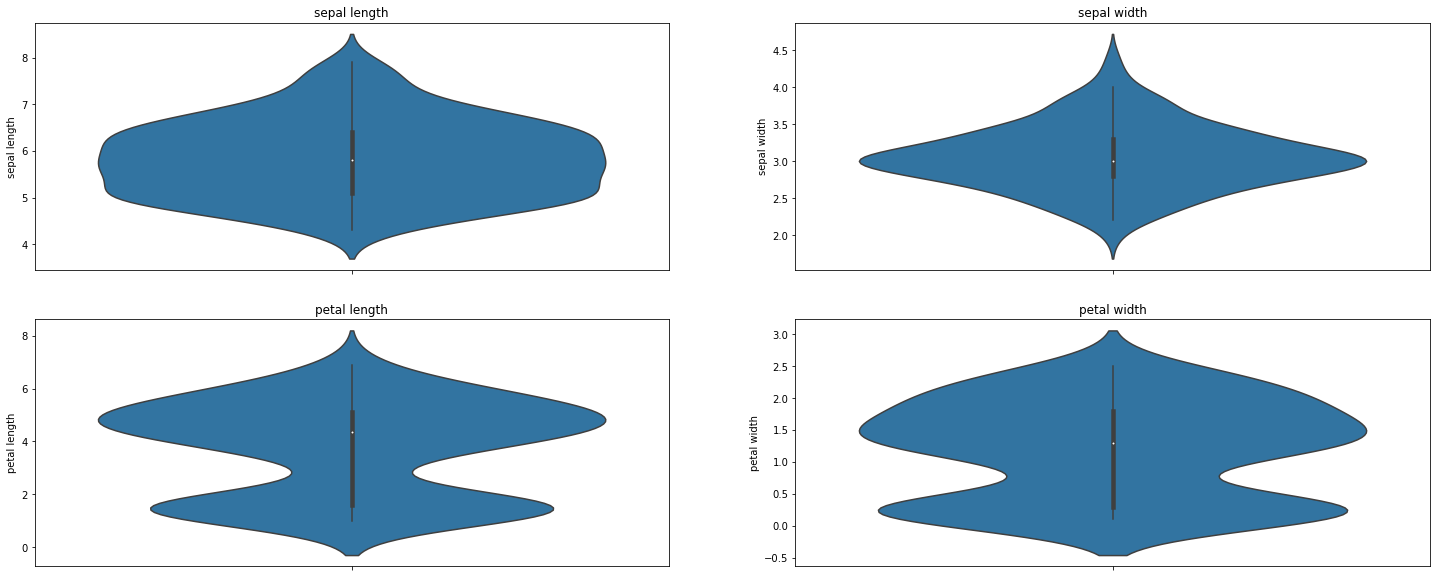

In [86]:
from itertools import product
order = [item for item in product([0, 1,], repeat=2)]


f, axes = plt.subplots(2, 2 , figsize = (25, 10))
for name , order in zip (df.columns, order):
    ax = axes[order[0], order[1]]
    sns.violinplot( y=name, data=df , ax =ax)
    ax.set_title(name)

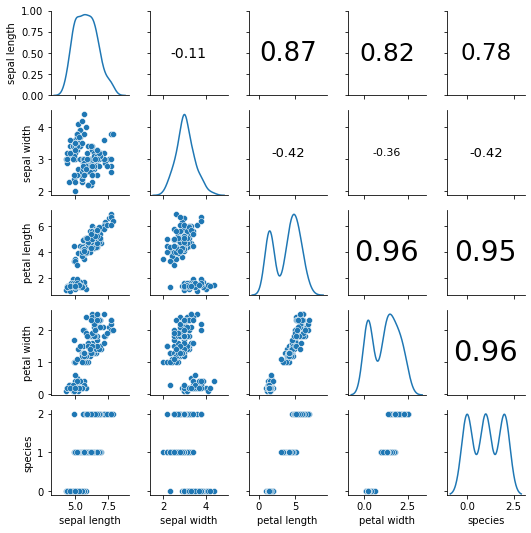

In [87]:

def corr(x, y, **kwargs):
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    # Add the label to the plot
    ax = plt.gca()
    if abs(coef) <= 0.25:
        fontsize = 14
    else:
        fontsize = round(30*abs(coef))
    ax.annotate(
        "%.2f" %coef, (0.5, 0.5), xycoords='axes fraction'
        , ha='center', va='center', fontsize=fontsize
    )
    

g = sns.PairGrid(df, diag_sharey=False, height=1.5)
# g.map_upper(sns.scatterplot)
g.map_upper(corr)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)

In [88]:
# создать датафрейм через словарь 
my_data = pd.DataFrame({'type':['A', 'A', 'B', 'B'],'value': [10, 14, 12, 23]} )
# создать датафрейм через список списков
my_data = pd.DataFrame([['A', 10],['A',14],['B',12],['B', 23]], columns=['type','value'])
# через Series в пандасе
column_2=pd.Series([10,14,12,23])
column_1=pd.Series(['A','A','B','B'])
my_data=pd.DataFrame({'type':column_1, 'value':column_2})

In [89]:
# В переменную с именем subset_1 сохраните только первые 10 строк и только 1 и 3 колонку.

%timeit subset_1 = concentrations.iloc[0:10, [0, 2]]

%timeit subset_1 = concentrations.iloc[:10,[0,2]]
%timeit subset_1=concentrations.drop([x for x in concentrations.columns if x not in ('group','genus')],\
                                     axis=1).head(10)

285 µs ± 5.58 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
295 µs ± 5.19 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
365 µs ± 4.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [90]:
# В переменную с именем subset_2 сохраните все строки кроме 1 и 5 и только 2 и 4 колонку.
%timeit subset_2 = concentrations[~concentrations.index.isin([0, 4])].iloc[0:, [1, 3]]
%timeit subset_2= concentrations.drop([0,4], axis=0).drop([x for x in concentrations.columns if x not in ('group','genus')], axis=1)
%timeit subset_2 = concentrations.iloc[lambda x: (x.index != 0) & (x.index != 4), [1, 3]]
%timeit subset_2 = concentrations.drop(index=[0, 4]).filter(regex='[24]')
%timeit subset_2 = concentrations.iloc[[x for x in range(concentrations.shape[0]) if x not in [0,4]],[1,3]]

567 µs ± 57.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
568 µs ± 5.89 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
594 µs ± 15.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
548 µs ± 3.76 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
439 µs ± 9.09 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Another common operation is the use of boolean vectors to filter the data. The operators are: | for or, & for and, and ~ for not. These must be grouped by using parentheses.

In [91]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')

In [92]:

# В переменную subset_1 сохраните только те наблюдения, у которых значения переменной V1
# строго больше 0, и значение переменной V3  равняется 'A'.


%timeit subset_1 = my_stat[(my_stat['V1'] > 0) & (my_stat['V3'] == 'A')]
%timeit subset_1 = my_stat.query("V1 > 0 and V3 == 'A'" )
%timeit subset_1 = my_stat.iloc[np.where((my_stat.V1.values>0)&(my_stat.V3.values=='A'))]

540 µs ± 5.25 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.68 ms ± 7.24 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
256 µs ± 1.35 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [93]:
# В переменную  subset_2  сохраните только те наблюдения, у которых значения переменной V2  не равняются 10, 
# или значения переменной V4 больше или равно 1.
%timeit subset_2 = my_stat[(my_stat['V2'] != 10) | (my_stat['V4'] >= 1)]
%timeit subset_2 = my_stat.query('V2 != 10 or V4 >= 4' )
%timeit subset_2 = my_stat.iloc[np.where((my_stat.V2.values!=10)|(my_stat.V4.values>=1))]


561 µs ± 1.12 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.53 ms ± 10.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
245 µs ± 6.55 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [94]:
'''
Теперь давайте преобразуем наши данные. В переменной my_stat лежат данные с которыми вам необходимо проделать следующее дейтвие. 
В этих данных (my_stat) создайте две новые переменных:

V5 = V1 + V4

V6 = натуральный логарифм переменной V2


'''

'\nТеперь давайте преобразуем наши данные. В переменной my_stat лежат данные с которыми вам необходимо проделать следующее дейтвие. \nВ этих данных (my_stat) создайте две новые переменных:\n\nV5 = V1 + V4\n\nV6 = натуральный логарифм переменной V2\n\n\n'

In [95]:
%time my_stat = my_stat.assign( V5 = my_stat['V1'] + my_stat['V2'], \
                               V6 = np.log(my_stat['V2']))

Wall time: 2 ms


In [96]:
%time
V6 = np.log(my_stat['V2'])
my_stat.eval(
    '''V5 = V1 + V2
    V6 = @V6
    '''
, inplace=True)

Wall time: 0 ns


In [97]:
%time
my_stat['V5'] = my_stat['V1']+my_stat['V4']
my_stat['V6'] = my_stat.loc[:,'V2'].apply(lambda x: math.log(x))

Wall time: 0 ns


<div class="alert alert-warning">
<h2> Soft </h2>
</div>

Тезисы из видео:

1. При построении карьеры в Data Science важно иметь готовые проекты, чтобы на собеседовании направить диалог по удобному для себя руслу, да и просто продемонстрировать свои конкурентные преимущества (хакатоны, работа через API). **Как вараинт быстро сделать проект для той компании в которую, желаешь устроиться, то есть point в том, что нужно понимать с чем рабоатет компания и вообще собеседование пройдет более предметно )**

2. Датасеты для анализа можно брать с kaggle, открытых источников, или просто собирать при помощи парсеров. причём последний вариант даёт плюс к компетенциям, поскольку вы покажете умение кодить и получать данные для своих моделей

3. Важны soft-skills

4. Важно и нужно уметь отвечать на вопросы не "Сколько?", а "Почему?". Поскольку получение цифр не даёт информации, а анализ этих цифр, анализ причин почему цифры именно такие, и как они сформировались - позволяет представить некоторую картину в процессах.

5. Работайте с API и хакатонами. Поднатаскайтесь в плане работы с проектами, пусть даже через API проекта. Пишите свои проекты и ссылайтесь на них в резюме.

<div class="alert alert-warning">
<h2> ML </h2>
</div>

In [98]:
events_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip',
                          compression ='zip',
#                           parse_dates = ['timestamp'],
#                           date_parser = lambda t: pd.Timestamp(int(t), unit = 's'), #tz = 'Europe/Moscow')
                          infer_datetime_format = True,
                         )

In [99]:
events_data

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
...,...,...,...,...
3480698,33375,1526772685,viewed,11677
3480699,32815,1526772750,viewed,5198
3480700,32815,1526772750,discovered,5198
3480701,32815,1526772750,passed,5198


<AxesSubplot:xlabel='day'>

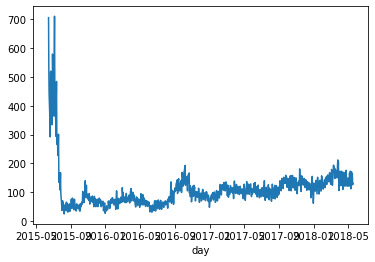

In [100]:
events_data['time'] = pd.to_datetime(events_data.timestamp , unit = 's')
events_data['day'] = events_data.time.dt.date
events_data.groupby('day') \
            .user_id.nunique().plot()

<AxesSubplot:>

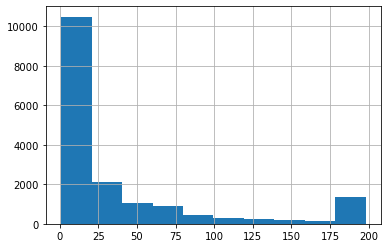

In [101]:
events_data[events_data.action == 'passed'] \
        .groupby('user_id', as_index = False) \
        .agg({'step_id': 'count'}) \
        .rename(columns = {'step_id': 'passed_step'}).passed_step.hist()

In [102]:
gap = events_data[['user_id', 'day', 'timestamp']] \
        .drop_duplicates(subset = ['user_id', 'day']) \
        .groupby('user_id')['timestamp'] \
        .apply(list) \
        .apply(np.diff)\
        .values

<AxesSubplot:>

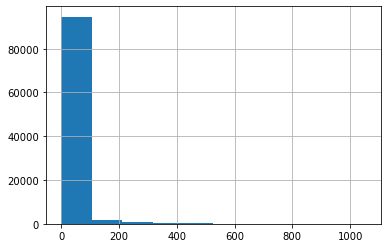

In [103]:
gap_data = pd.Series(np.concatenate(gap)) / (24 *60*60)
gap_data.hist()

In [104]:
# только 5% процентов пользователей вернется через 59 дней (2 месяца)
gap_data.quantile(0.95)

59.760440972222156

In [105]:
gap_data.quantile(np.arange(0.9, 0.99, 0.01)).round(1)

0.90     18.3
0.91     22.1
0.92     27.5
0.93     34.8
0.94     44.9
0.95     59.8
0.96     82.1
0.97    120.8
0.98    179.2
dtype: float64

In [106]:
events_data['m'] = events_data.time.dt.month
events_data['y'] = events_data.time.dt.year

In [107]:
data  = events_data.pivot_table(index = ['y', 'm' , 'user_id'],
                        values = 'action', aggfunc = 'count')

In [108]:
data = data.reset_index()
insd = data.groupby(['user_id'])['action'].apply(list).index
value = data.groupby(['user_id'])['action'].apply(list).values

In [109]:
df = pd.DataFrame(zip(insd, value) , columns = ['user', 'list'])
df['l']= df['list'].apply(lambda x: len(x))

In [110]:
df.sort_values(by ='l')

,user,list,l
0,1,[2],1
11543,16042,[30],1
11544,16044,[24],1
11545,16045,[2],1
11547,16048,[264],1
...,...,...,...
17769,24752,"[121, 17, 16, 5, 42, 65, 1, 13, 14, 27, 12, 10...",20
5488,7596,"[813, 646, 150, 12, 13, 45, 3, 10, 9, 2, 20, 8...",21
15757,21969,"[62, 151, 59, 20, 31, 9, 34, 9, 127, 231, 437,...",24
806,1078,"[1194, 929, 3, 121, 16, 9, 7, 8, 20, 8, 3, 1, ...",28


# Решающие деревья

In [390]:
from IPython.core.display import HTML
style = "<style>svg{width:70% !important; height: 70% !important;}<style>"
HTML(style)

Энтропия - мера беспорядка. Чем выше энтропия, тем хуже получается разделить классы.

В бинарном классификации энтропия находится от 0 до 1. 
$$E(S) = -\Sigma p_i*log_2p_i$$

IG = information gain
$$IG = \mathbb{E}(Y) - \mathbb{E}(Y|X)$$
$$E(Y∣X)= \frac{n_1}{N}*\mathbb{E}_1+\frac{n_2}{N}*\mathbb{E}_2$$
где $\mathbb{E}(Y|X)$ - словная интропия

Сплиты определяются на оснвоании information gain простоым перебором

**Как выбирается точка расщепления для непрерывных переменных в деревьях решений?**

Чтобы получить точку разделения, значения сортируются, а средние точки между соседними значениями оцениваются в терминах некоторой метрики, обычно  information gain или коэффициент джини. Для вашего примера предположим, что у нас есть четыре примера и значения переменной age равны (20,29,40,50). Средние точки между значениями (24.5,34.5,45) оцениваются, и используется любое разделение, которое дает наилучший прирост информации (или любую метрику, которую вы используете) на обучающих данных.

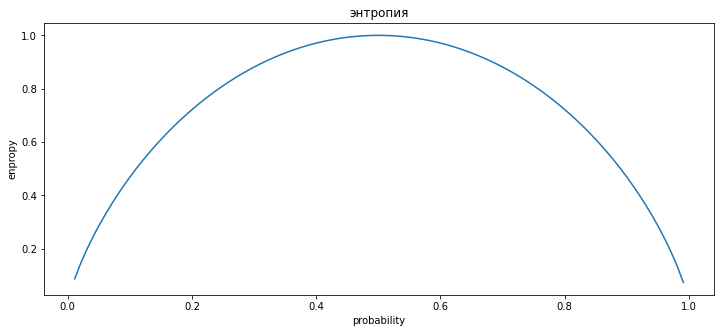

In [225]:
# Как ведет себя инропия на дисбалансе классов?
probability = [x for x in np.arange(0.011, 1, 0.01)]
enpropy = [-(i*np.log2(i)+(1-i)*np.log2(1-i))  for i in probability]
f, axes = plt.subplots(1, 1, figsize =(12, 5))
sns.lineplot(x =probability, y =enpropy , ax=axes)
axes.set_ylabel('enpropy')
axes.set_xlabel('probability')
axes.set_title('энтропия')
plt.show()

In [111]:
from sklearn import tree

In [262]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 
                     'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 
                     'Y': [1, 1, 1, 1, 0, 0, 0, 0]})
data = pd.read_csv('https://stepik.org/media/attachments/course/4852/cats.csv',  index_col=0)

In [242]:
data

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик
8,1,1,1,котик
9,0,0,1,котик


In [243]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [244]:
X = data.iloc[:,0:3]
y = data.iloc[:, 3]

In [245]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [246]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

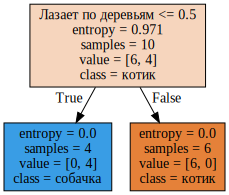

In [250]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                  class_names=['котик', 'собачка'],
                                   filled=True))

display(SVG(graph.pipe(format='svg')))

In [ ]:
'''
задача про котов
'''

In [202]:
E_sh_sob=(1/1)*math.log2((1/1)) - 0
E_sh_kot=-(4/9)*math.log2((4/9)) - (5/9)*math.log2((5/9))
E_gav_sob=0 - (5/5)*math.log2((5/5))
E_gav_kot=-(4/5)*math.log2((4/5)) - (1/5)*math.log2((1/5))
E_laz_sob=0 - (6/6)*math.log2((6/6))
E_laz_kot=-(4/4)*math.log2((4/4)) - 0

In [ ]:
# выбираем наилучший сплит
E = -(4/10)*math.log2(4/10) - (6/10)*math.log2(6/10)
IG_sh = E - (1/10)*E_sh_sob - (9/10)*E_sh_kot
IG_gav = E - (5/10)*E_gav_sob - (5/10)*E_gav_kot
IG_laz = E - (6/10)*E_laz_sob - (6/10)*E_laz_kot

In [276]:
def enpopy(df, col = 'Вид'):
    cols = df[col].unique()
    N = df.shape[0]
    sum_ = 0
    for i in cols:
        n = df[df[col]==i].shape[0]
        sum_ += n/N * np.log2( n/N)
    return -sum_

In [325]:
IG(data)

Прирост информации (IG) при сплите признака Шерстист: 0.08
-0.0
Прирост информации (IG) при сплите признака Гавкает: 0.61
-0.0
Прирост информации (IG) при сплите признака Лазает по деревьям: 0.97
-0.0


In [324]:
# Вычисление IG (Information Gain) по каждому признаку
def IG(df, col = 'Вид'):
    N = df.shape[0]
    for group_name in df.columns[:-1]:
        S0 = enpopy(df, col ) #Начальная энтропия
        for v in df[group_name].unique():
            part_df = df[df[group_name] == v]
            n = part_df.shape[0]
            S0 -= (n/N * enpopy(part_df))
        print('Прирост информации (IG) при сплите признака {}:'.format(group_name), S0.round(2))

In [369]:
titatic = pd.read_csv('data\\titanik_full_data.csv', sep = '\t')

In [378]:
titatic.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1013
Embarked          2
dtype: int64

In [379]:

# label encoding 

titatic.fillna(value = {'Age': titatic.Age.median()}, inplace = True)
titatic.dropna(subset = ['Fare'], inplace = True)
x = titatic.drop(['PassengerId', 'Survived', 'Name','Ticket', 'Cabin'], axis = 1)
x = pd.get_dummies(x)
y=  titatic[['Survived']]


from sklearn.model_selection import train_test_split
# Разделение набора данных для обучения и тестирования. 75% данных используется для обучения модели, 
# а 25% — для тестирования производительности нашей модели.
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [382]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

clf.fit(xtrain, ytrain)


DecisionTreeClassifier(criterion='entropy')

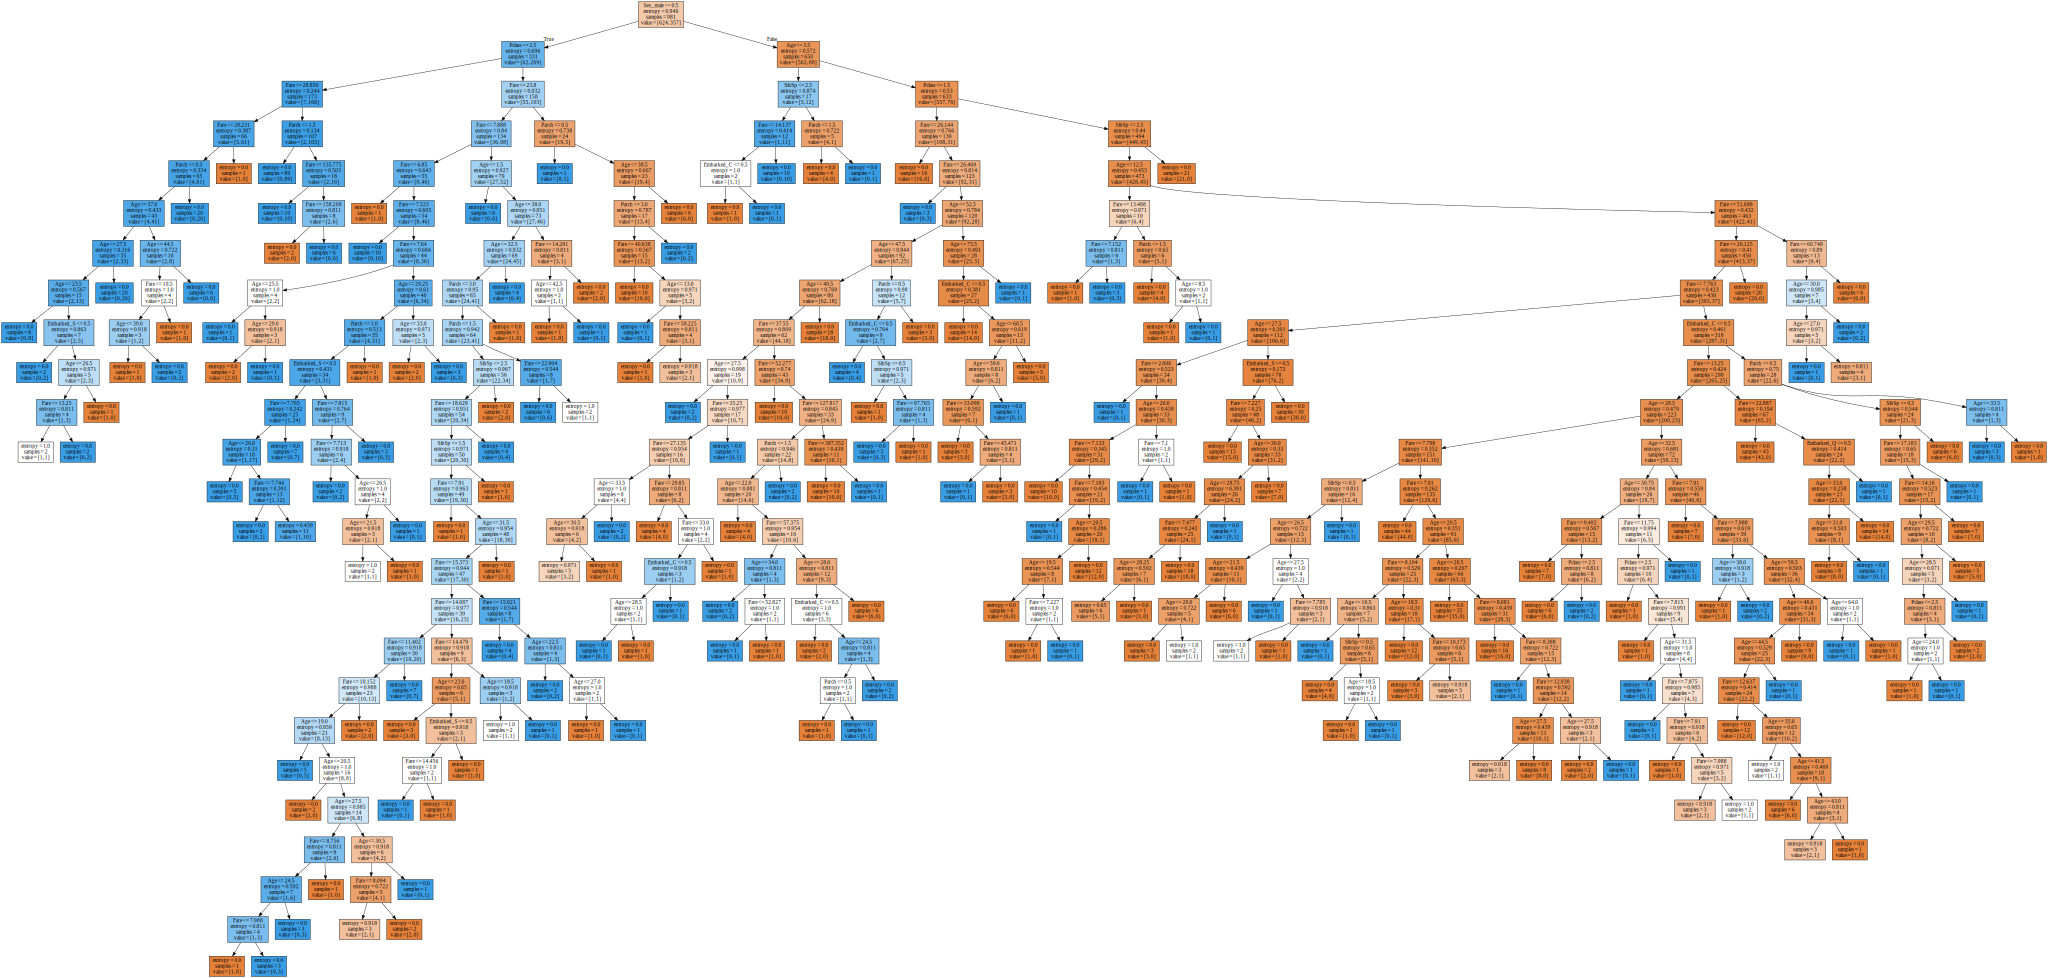

In [384]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(xtrain),
#                                   class_names=['котик', 'собачка'],
                                   filled=True))

display(SVG(graph.pipe(format='svg')))